MINI PROJECT  -  SOCIAL MMEDIA BOT DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("social media bot detection.file.csv.csv")
df.head()

,username,text,followers_count,retweet_count,label
0,@user_0,Get 10k followers instantly! Visit http://spam...,22,1,bot
1,@user_1,Just finished a 5k run! Feeling great 💪,1125,22,human
2,@user_2,Breaking news from bot channel: tech,17,4,bot
3,@user_3,Auto-update: Weather today is sunny ☀️,13,5,bot
4,@user_4,Celebrating my birthday with friends 🎉,3301,0,human


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   username         500 non-null    object
 1   text             500 non-null    object
 2   followers_count  500 non-null    int64 
 3   retweet_count    500 non-null    int64 
 4   label            500 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.7+ KB
None


In [4]:
print("\nLabel distribution:\n", df['label'].value_counts())


Label distribution:
 label
bot      255
human    245
Name: count, dtype: int64


In [5]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 username           0
text               0
followers_count    0
retweet_count      0
label              0
dtype: int64


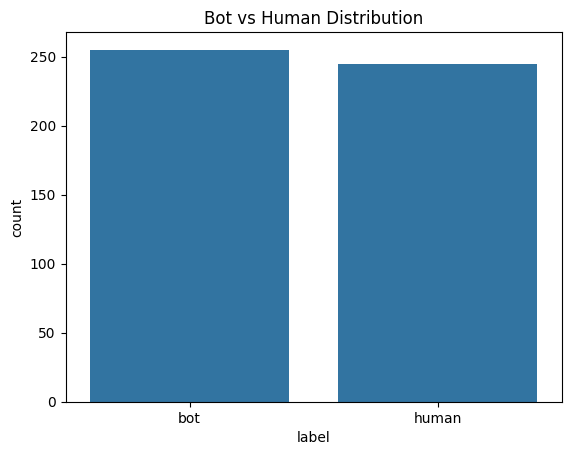

In [6]:
sns.countplot(data=df, x='label')
plt.title("Bot vs Human Distribution")
plt.show()

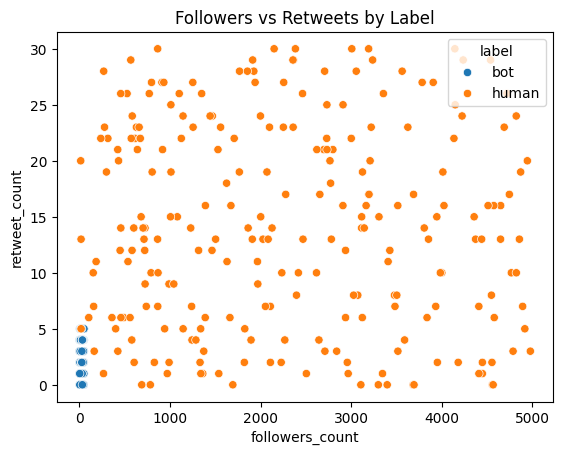

In [7]:
sns.scatterplot(data=df, x='followers_count', y='retweet_count', hue='label')
plt.title("Followers vs Retweets by Label")
plt.show()

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy

In [9]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=300)
X_text = vectorizer.fit_transform(df['text'])

In [10]:
X_numeric = df[['followers_count', 'retweet_count']].values
X = scipy.sparse.hstack((X_text, X_numeric))

In [11]:
y = df['label'].map({'human': 0, 'bot': 1})

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test)

In [16]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        55

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



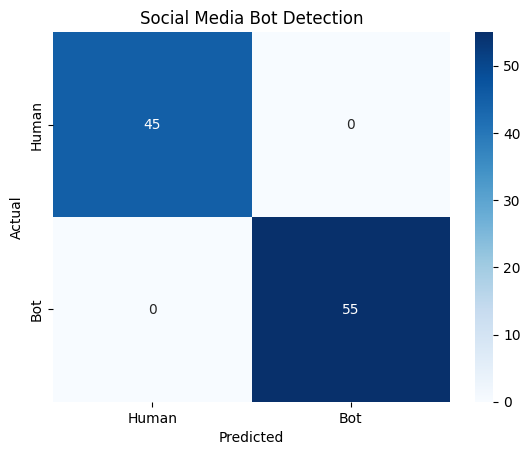

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Human', 'Bot'], yticklabels=['Human', 'Bot'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Social Media Bot Detection")
plt.show()